In [200]:
import pandas as pd

# 테이블

In [201]:
log=pd.read_csv('data/log_df.csv')
log

,customerid,mx,Recency,Frequency,Monetary,ATV,churn_yn,labels
0,16282.0,2011-01-04 11:42,339,1,168.30,15.300000,1,2
1,15266.0,2011-01-05 13:40,338,1,119.30,19.883333,1,2
2,15464.0,2011-01-05 15:56,338,1,1048.85,6.680573,1,2
3,12386.0,2011-01-06 12:37,337,1,143.00,71.500000,1,2
4,13187.0,2011-01-06 18:57,337,1,236.02,6.378919,1,2
...,...,...,...,...,...,...,...,...
4095,17389.0,2011-12-09 9:38,0,34,31833.68,149.453897,0,3
4096,17001.0,2011-12-09 9:38,0,10,3591.61,22.876497,0,3
4097,15694.0,2011-12-09 9:44,0,11,5632.07,86.647231,0,3
4098,17428.0,2011-12-09 9:45,0,26,16362.90,53.825329,0,3


In [202]:
mm=pd.read_csv('data/mm_df.csv')
mm

,customerid,mx,Recency,Frequency,Monetary,ATV,churn_yn,labels
0,16282.0,2011-01-04 11:42,339,1,168.30,15.300000,1,3
1,15266.0,2011-01-05 13:40,338,1,119.30,19.883333,1,3
2,15464.0,2011-01-05 15:56,338,1,1048.85,6.680573,1,3
3,12386.0,2011-01-06 12:37,337,1,143.00,71.500000,1,3
4,13187.0,2011-01-06 18:57,337,1,236.02,6.378919,1,3
...,...,...,...,...,...,...,...,...
4095,17389.0,2011-12-09 9:38,0,34,31833.68,149.453897,0,0
4096,17001.0,2011-12-09 9:38,0,10,3591.61,22.876497,0,0
4097,15694.0,2011-12-09 9:44,0,11,5632.07,86.647231,0,0
4098,17428.0,2011-12-09 9:45,0,26,16362.90,53.825329,0,0


In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

res = pairwise_tukeyhsd(log['Recency'],log['labels'],  alpha=0.05)
print(res)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     0      1  -51.9394   0.0  -58.3434  -45.5355   True
     0      2  105.4066   0.0   99.4284  111.3848   True
     0      3  -66.5745   0.0  -73.4151  -59.7339   True
     1      2   157.346   0.0   151.228  163.4641   True
     1      3  -14.6351   0.0  -21.5982   -7.6719   True
     2      3 -171.9811   0.0 -178.5548 -165.4074   True
--------------------------------------------------------


In [11]:
def tukey(variance,group,alpha=0.05):
    res=pairwise_tukeyhsd(variance,group,alpha=alpha)
    print(res)
    return res

## Log 변환 군집결과

In [12]:
res1=tukey(log['Recency'],log['labels'])
res2=tukey(log['Frequency'],log['labels'])
res3=tukey(log['Monetary'],log['labels'])
res4=tukey(log['ATV'],log['labels'])

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     0      1  -51.9394   0.0  -58.3434  -45.5355   True
     0      2  105.4066   0.0   99.4284  111.3848   True
     0      3  -66.5745   0.0  -73.4151  -59.7339   True
     1      2   157.346   0.0   151.228  163.4641   True
     1      3  -14.6351   0.0  -21.5982   -7.6719   True
     2      3 -171.9811   0.0 -178.5548 -165.4074   True
--------------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5948    0.0    -2.3 -0.8896   True
     0      2  -2.4548    0.0  -3.113 -1.7965   True
     0      3    7.707    0.0  6.9538  8.4603   True
     1      2  -0.8599 0.0058 -1.5336 -0.1863   True
     1      3   9.3018    0.0  8.5351 10.0686   True
     2

# 사후검정 군집 변수별 차이

## Recency
집단별 차이가 통계적으로 유의함.  
2번군집>0번군집>1번군집>3번군집 순

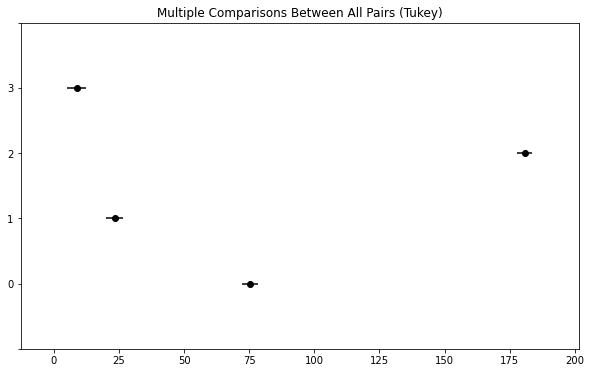

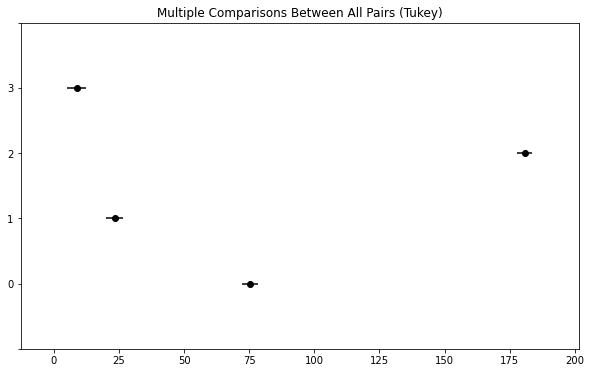

In [15]:
res1.plot_simultaneous()

## Frequency
집단별 차이가 통계적으로 유의함.  
3번군집>0번군집>1번군집>2번군집 순

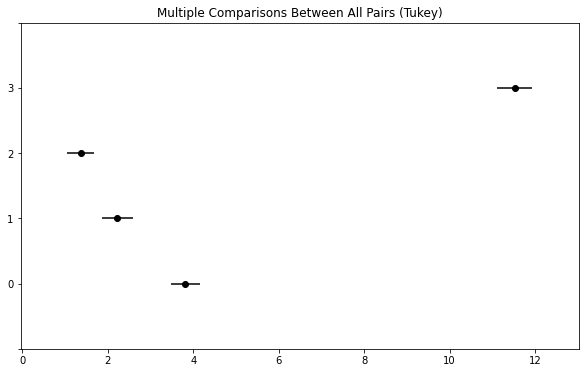

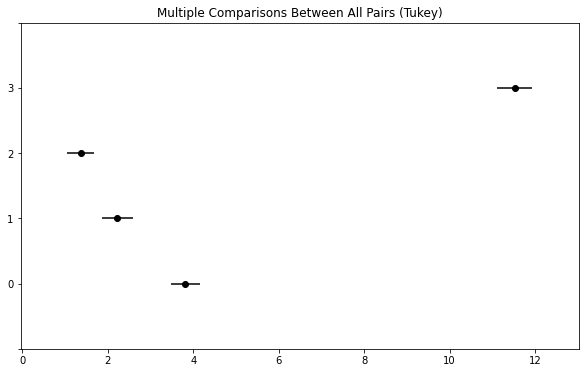

In [16]:
res2.plot_simultaneous()

## Monetary
대체로 집단별 차이가 통계적으로 유의하나 1,2번군집은 통계적으로 차이가 없음.  
3번군집>0번군집>1번군집>2번군집 순

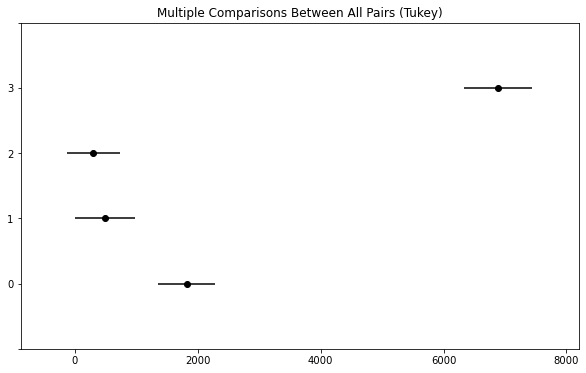

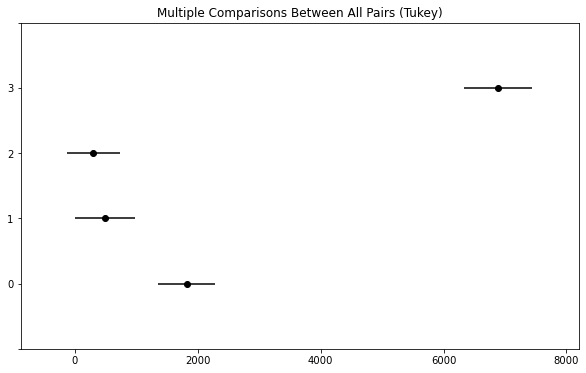

In [17]:
res3.plot_simultaneous()

## ATV
군집별 ATV가 통계적으로 차이가 없음.  
0번군집>3번군집>2번군집>1번군집 순

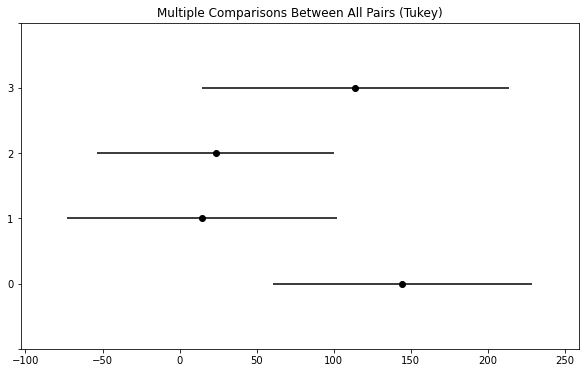

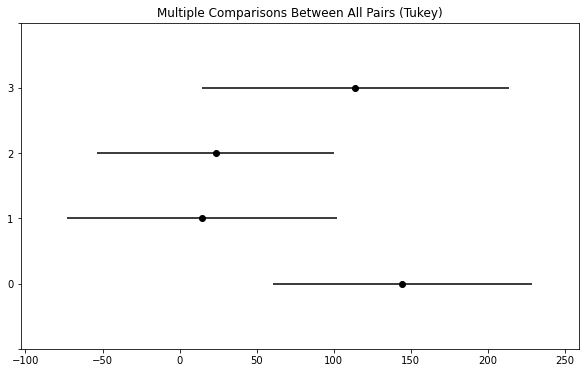

In [18]:
res4.plot_simultaneous()

## Min-Max 변환 군집 결과

In [20]:
res1_1=tukey(mm['Recency'],mm['labels'])
res2_2=tukey(mm['Frequency'],mm['labels'])
res3_3=tukey(mm['Monetary'],mm['labels'])
res4_4=tukey(mm['ATV'],mm['labels'])

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1 155.1925   0.0   152.709  157.676   True
     0      2   57.532   0.0   55.5125  59.5515   True
     0      3 260.1681   0.0  257.4957 262.8404   True
     1      2 -97.6605   0.0 -100.4149 -94.9061   True
     1      3 104.9756   0.0  101.7121  108.239   True
     2      3  202.636   0.0  199.7102 205.5619   True
------------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -4.2327    0.0 -5.0733 -3.3921   True
     0      2  -3.5248    0.0 -4.2084 -2.8413   True
     0      3  -4.9034    0.0 -5.8079 -3.9989   True
     1      2   0.7079 0.2069 -0.2244  1.6401  False
     1      3  -0.6707 0.4015 -1.7752  0.4339  False
     2      3  -1.3785  0.

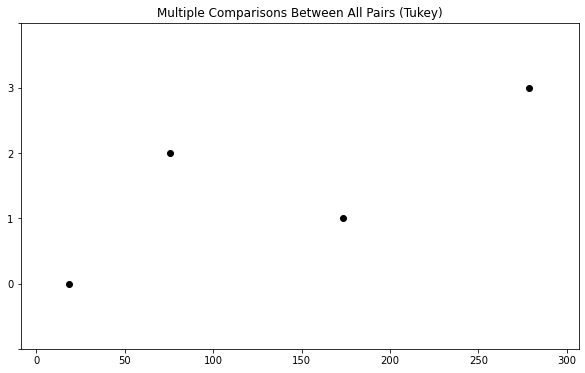

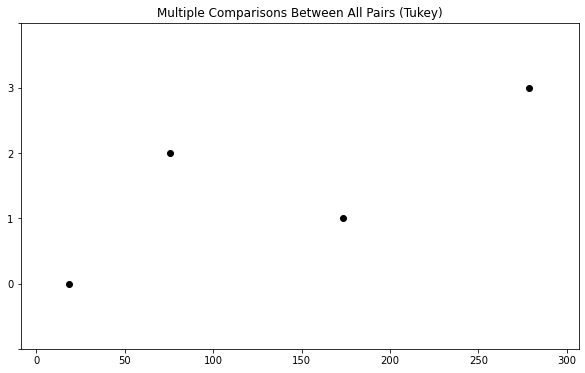

In [26]:
res1_1.plot_simultaneous()

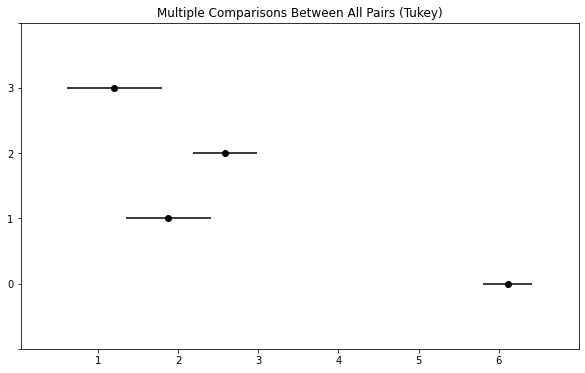

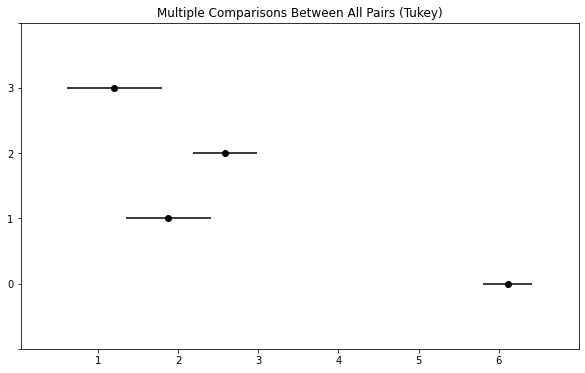

In [23]:
res2_2.plot_simultaneous()

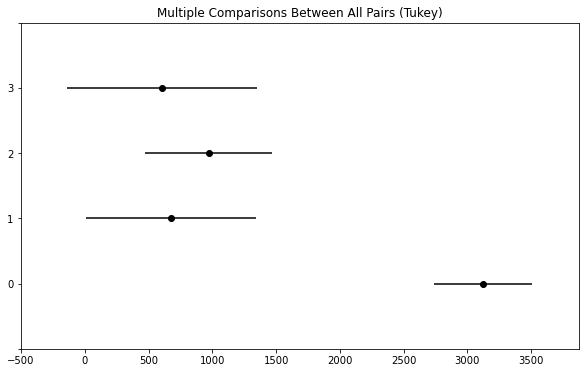

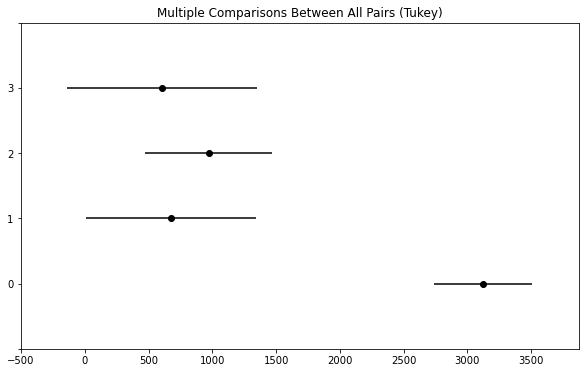

In [24]:
res3_3.plot_simultaneous()

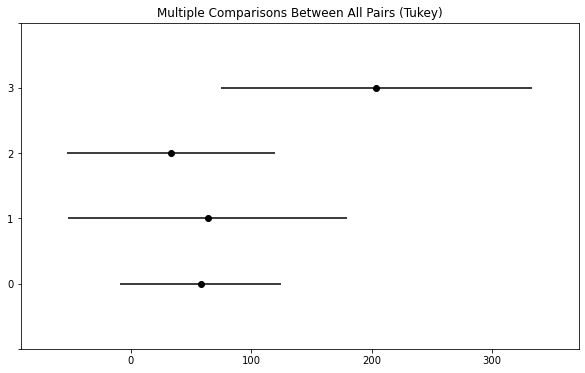

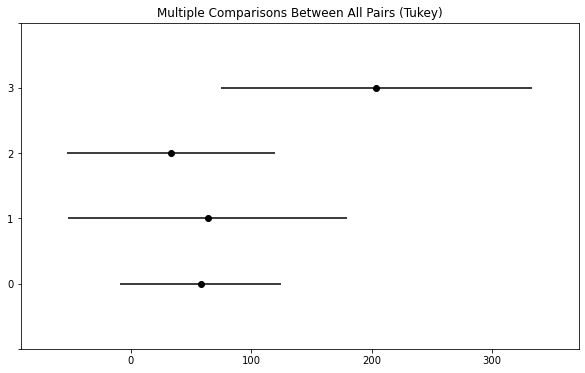

In [25]:
res4_4.plot_simultaneous()

# 연관상품

In [203]:
import pymysql

In [204]:
def SQL_load(sql):
    # db접속
    db=pymysql.connect(host='localhost',port=3306,user='root',
                   passwd='661400',db='plt',charset='utf8',
                  cursorclass=pymysql.cursors.DictCursor)
    
    cs=db.cursor()
    
    cs.execute(sql)

    res=cs.fetchall()

    df=pd.DataFrame(res)
    
    db.close()
    return df

In [205]:
retail=SQL_load('''select * from plt.retail_on_top10''')
label=SQL_load('''select * from plt.log_df''')

In [206]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
364667,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
364668,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
364669,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
364670,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France


In [243]:
label

,customerid,mx,Recency,Frequency,Monetary,ATV,churn_yn,labels
2166,12678.0,2011-10-28 7:39,42,10,17407.18,108.794875,0,3
2170,16843.0,2011-10-28 9:06,42,16,10196.57,26.975053,0,3
2236,16029.0,2011-11-01 10:27,38,57,67912.32,323.392000,0,3
2249,16729.0,2011-11-01 14:29,38,21,7239.92,10.969576,0,3
2259,17719.0,2011-11-02 10:36,37,15,5396.04,19.693577,0,3
...,...,...,...,...,...,...,...,...
4095,17389.0,2011-12-09 9:38,0,34,31833.68,149.453897,0,3
4096,17001.0,2011-12-09 9:38,0,10,3591.61,22.876497,0,3
4097,15694.0,2011-12-09 9:44,0,11,5632.07,86.647231,0,3
4098,17428.0,2011-12-09 9:45,0,26,16362.90,53.825329,0,3


In [232]:
label=label.query('labels==3')

In [239]:
product=pd.merge(retail,label.sample(50),how='inner',left_on='CustomerID',right_on='customerid')[['labels','customerid','Description']]

In [240]:
product

,labels,customerid,Description
0,3,17841.0,DISCO BALL CHRISTMAS DECORATION
1,3,17841.0,SET 10 LIGHTS NIGHT OWL
2,3,17841.0,SWEETHEART CAKESTAND 3 TIER
3,3,17841.0,STRAWBERRY SHOPPER BAG
4,3,17841.0,RED RETROSPOT SHOPPER BAG
...,...,...,...
15447,3,12713.0,SET OF 4 PANTRY JELLY MOULDS
15448,3,12713.0,PACK OF 20 NAPKINS PANTRY DESIGN
15449,3,12713.0,PACK OF 20 NAPKINS RED APPLES
15450,3,12713.0,JINGLE BELL HEART ANTIQUE SILVER


In [241]:
prod_1=product.copy()

In [242]:
a=pd.merge(product,prod_1,how='inner',on='customerid')

MemoryError: Unable to allocate 225. MiB for an array with shape (59034992,) and data type int32

In [211]:
df=a.drop('labels_y',axis=1)

In [212]:
df2=df.query('Description_x!=Description_y')

In [213]:
df2

,labels_x,customerid,Description_x,Description_y
1,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,VINTAGE SNAP CARDS
2,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,HAND WARMER OWL DESIGN
3,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,REGENCY CAKESTAND 3 TIER
4,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,RED RETROSPOT CAKE STAND
5,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,COOK WITH WINE METAL SIGN
...,...,...,...,...
1441176,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SWEETHEART 3 TIER CAKE STAND
1441177,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SET OF 4 ENGLISH ROSE PLACEMATS
1441178,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SET OF 36 TEATIME PAPER DOILIES
1441179,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SET OF 36 PAISLEY FLOWER DOILIES


In [214]:
df2.columns=['labels','id','prod_1','prod_2']

In [215]:
df2

,labels,id,prod_1,prod_2
1,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,VINTAGE SNAP CARDS
2,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,HAND WARMER OWL DESIGN
3,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,REGENCY CAKESTAND 3 TIER
4,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,RED RETROSPOT CAKE STAND
5,3,14299.0,SET OF 72 PINK HEART PAPER DOILIES,COOK WITH WINE METAL SIGN
...,...,...,...,...
1441176,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SWEETHEART 3 TIER CAKE STAND
1441177,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SET OF 4 ENGLISH ROSE PLACEMATS
1441178,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SET OF 36 TEATIME PAPER DOILIES
1441179,1,15699.0,PAPER BUNTING VINTAGE PAISLEY,SET OF 36 PAISLEY FLOWER DOILIES


In [216]:
cnt=df2.groupby(['labels','id','prod_1','prod_2']).value_counts()

In [217]:
df3=pd.DataFrame(cnt)
df3

0
labels id      prod_1                         prod_2                               
0      12886.0 12 PENCILS TALL TUBE WOODLAND  3 HOOK PHOTO SHELF ANTIQUE WHITE    1
                                              3 TRADITIONAl BISCUIT CUTTERS  SET  1
                                              36 DOILIES VINTAGE CHRISTMAS        1
                                              6 GIFT TAGS VINTAGE CHRISTMAS       1
                                              6 ROCKET BALLOONS                   1
...                                                                              ..
3      18055.0 YELLOW COAT RACK PARIS FASHION WICKER WREATH LARGE                 1
                                              WOOD 2 DRAWER CABINET WHITE FINISH  3
                                              WOOD S/3 CABINET ANT WHITE FINISH   2
                                              WOODEN FRAME ANTIQUE WHITE          4
                                              WOODEN PICTURE FRAME WHITE FINISH   5

[668262 rows x 1 columns]

In [218]:
df4=df3.reset_index().rename(columns={0:'cnt'})

In [221]:
rnk=df4.groupby(['id','prod_1','prod_2'])['cnt'].rank(method='min')

In [225]:
set(rnk>1)

{False}

# 군집별 많이 겹친 상품 추출